In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('/content/games.csv')

In [3]:
df

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [5]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [6]:
df.isnull().sum()

,0
id,0
rated,0
created_at,0
last_move_at,0
turns,0
victory_status,0
winner,0
increment_code,0
white_id,0
white_rating,0


In [7]:
df.duplicated().sum()

np.int64(429)

In [8]:
df.drop_duplicates()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [9]:
df.drop(columns=['id','white_id','black_id'],inplace=True)

In [10]:
df['victory_status'] = df['victory_status'].map({'outoftime':0,'resign':1,'mate':2,'draw':3})


In [11]:
df['rated']=df['rated'].map({True:1,False:0})

In [12]:
df['winner']= df['winner'].map({'white':0,'black':1,'draw':2})

In [13]:
df

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
0,0,1.504210e+12,1.504210e+12,13,0,0,15+2,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,1,1.504130e+12,1.504130e+12,16,1,1,5+10,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,1,1.504130e+12,1.504130e+12,61,2,0,5+10,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,1,1.504110e+12,1.504110e+12,61,2,0,20+0,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,1,1.504030e+12,1.504030e+12,95,2,0,30+3,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,1,1.499791e+12,1.499791e+12,24,1,0,10+10,1691,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,1,1.499698e+12,1.499699e+12,82,2,1,10+0,1233,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,1,1.499698e+12,1.499698e+12,35,2,0,10+0,1219,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,1,1.499696e+12,1.499697e+12,109,1,0,10+0,1360,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [14]:
df['white_rating'].min()

784

In [15]:
df['black_rating'].min()

789

In [16]:
df['white_rating'].max()

2700

In [17]:
df['white_rating'].max()

2700

<Axes: xlabel='winner', ylabel='turns'>

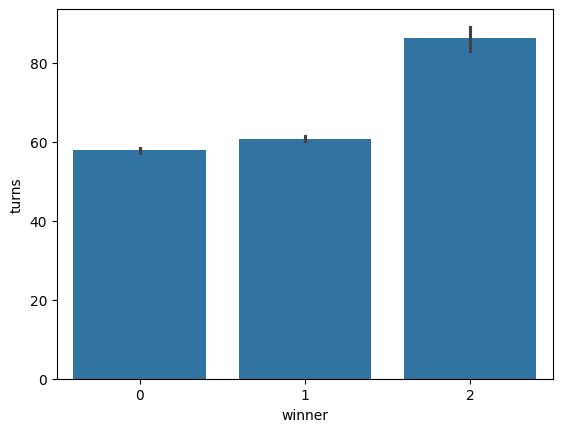

In [18]:
sns.barplot(x='winner',y='turns',data=df)

<Axes: xlabel='winner', ylabel='turns'>

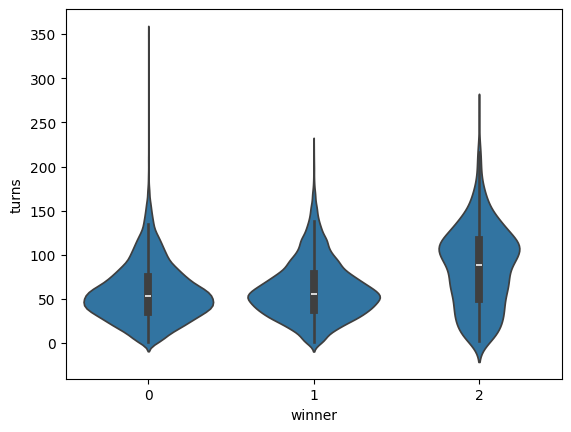

In [19]:
sns.violinplot(x='winner',y='turns',data=df)

<Axes: xlabel='black_rating', ylabel='white_rating'>

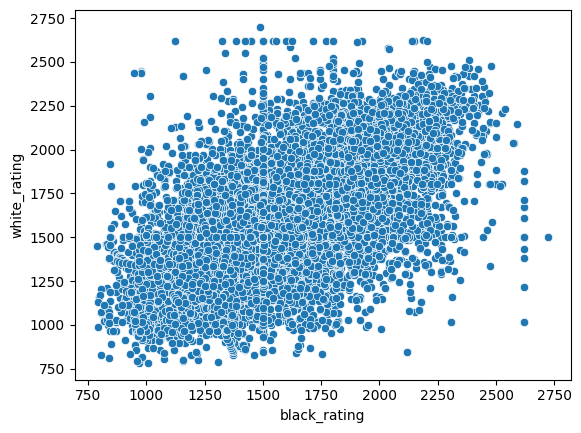

In [20]:
sns.scatterplot(x='black_rating',y='white_rating',data=df)

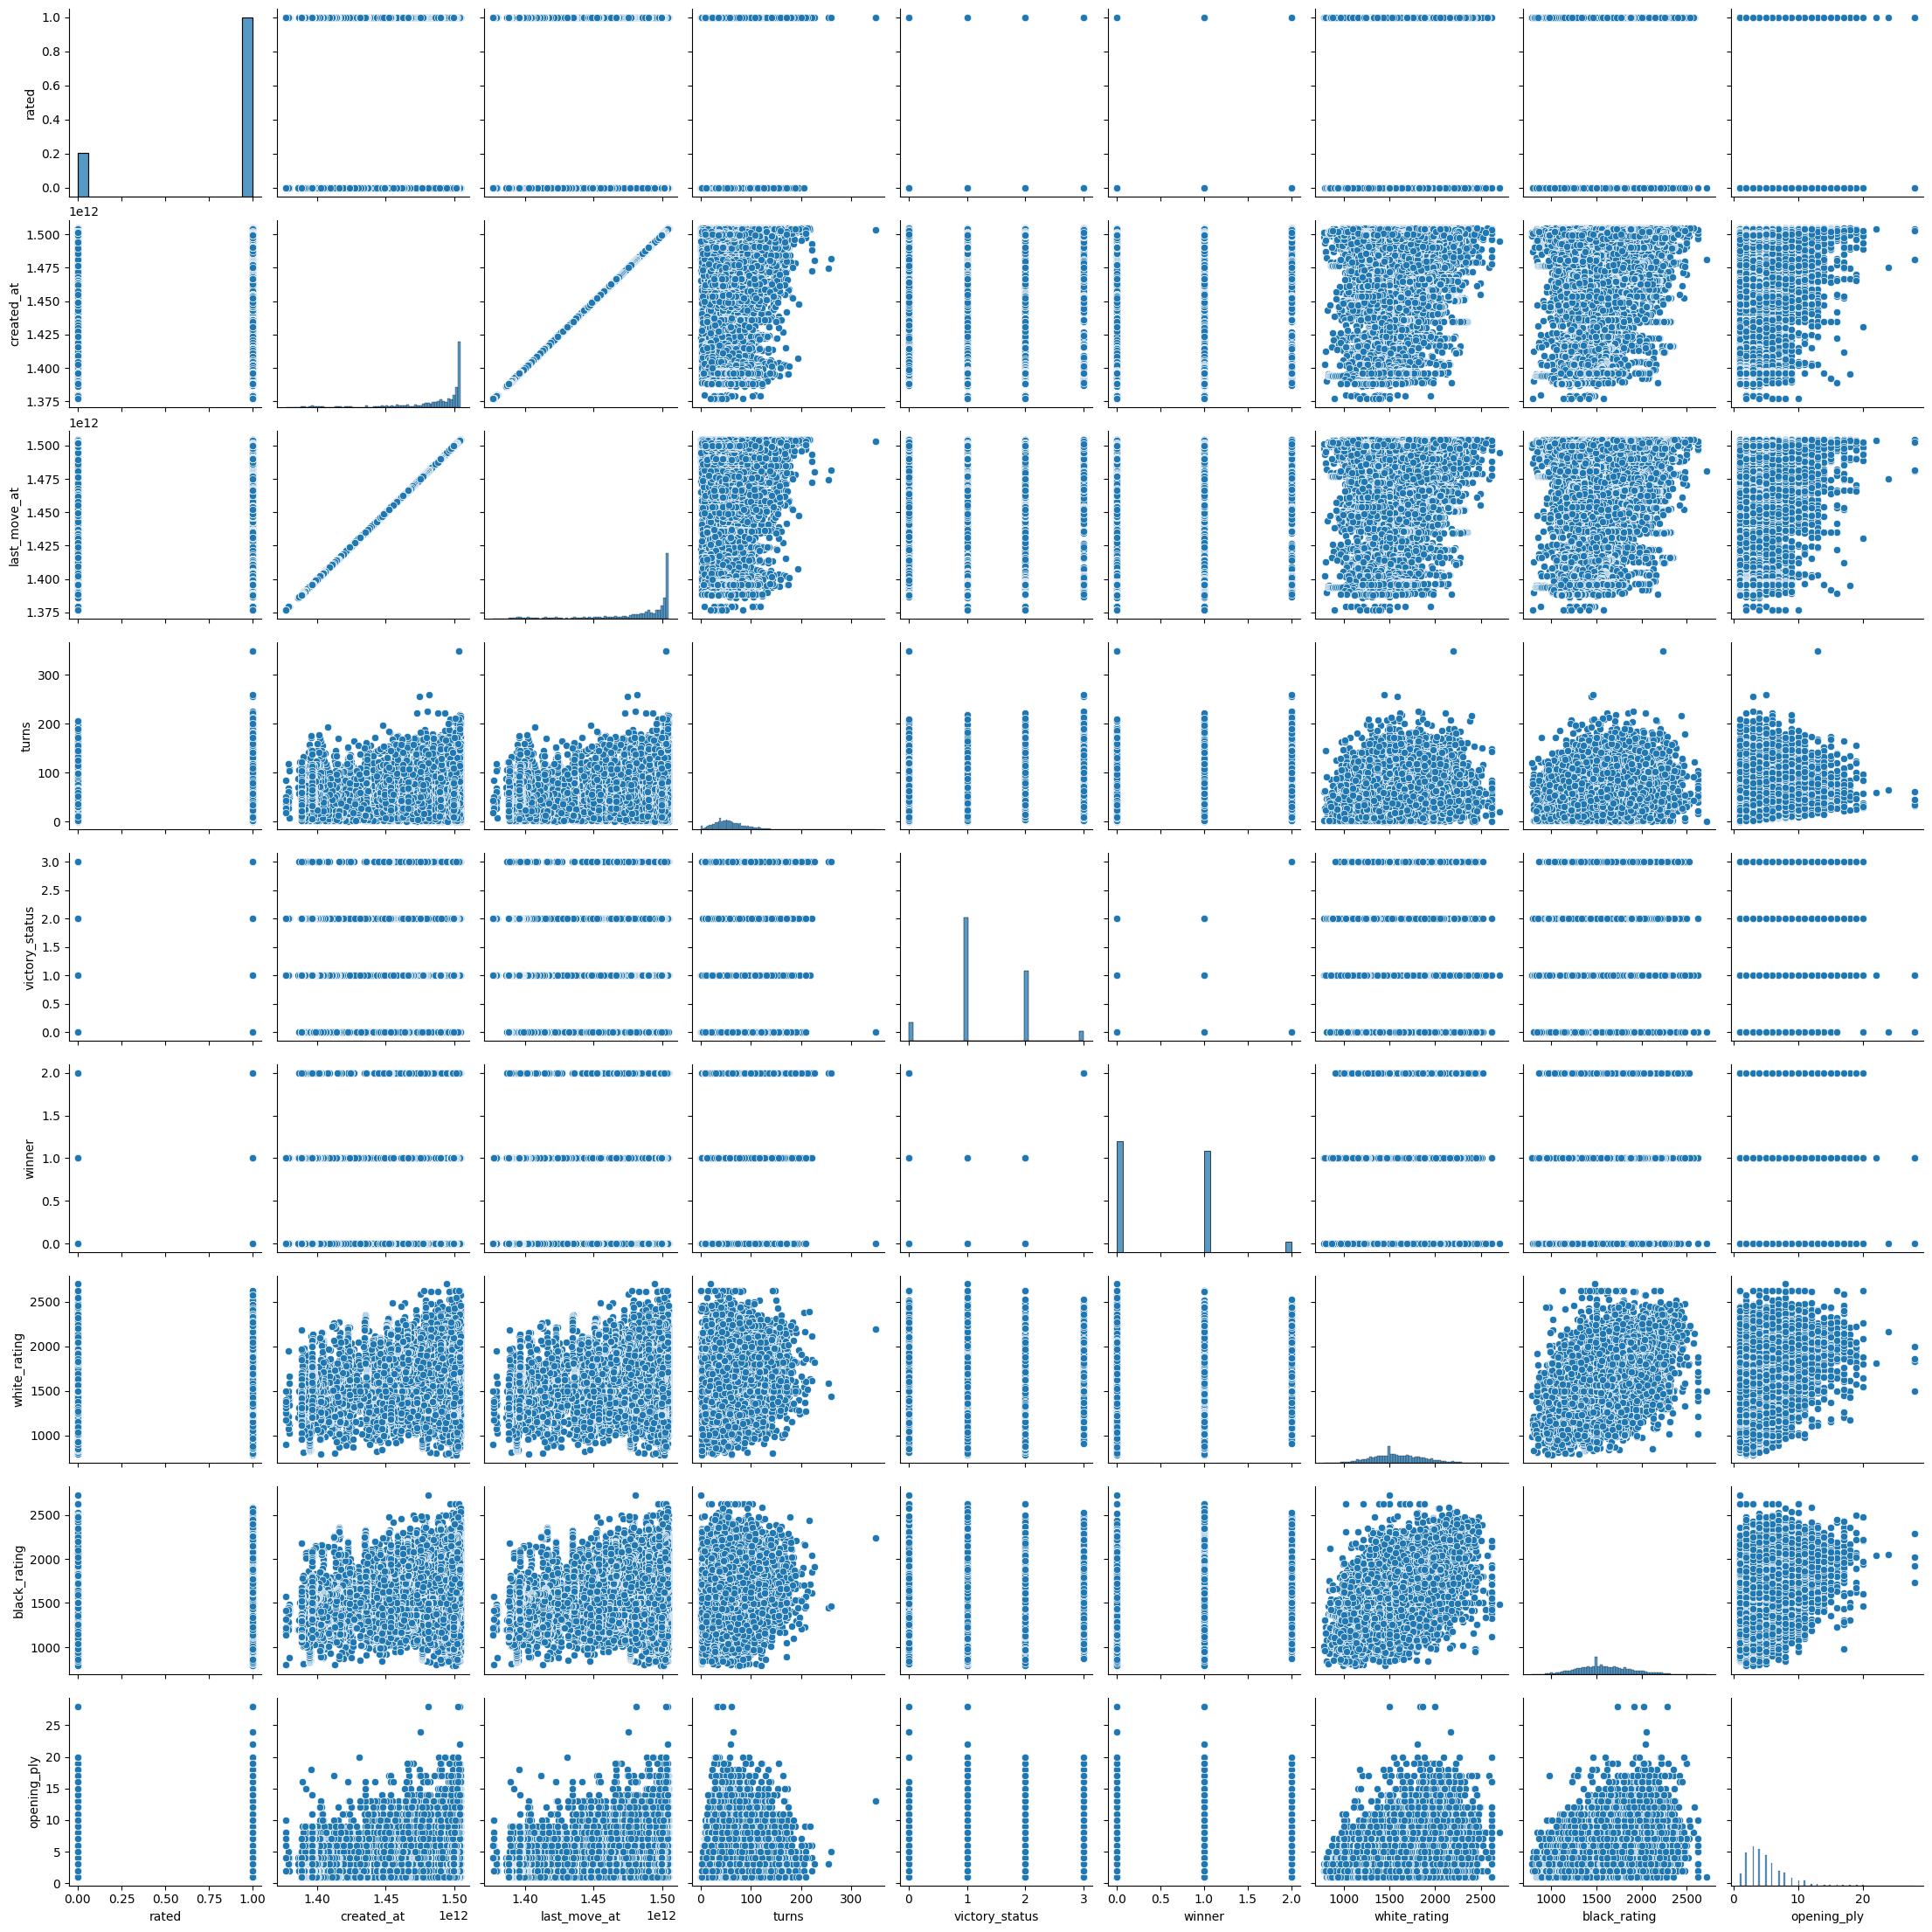

In [21]:
sns.pairplot(df)

<Axes: >

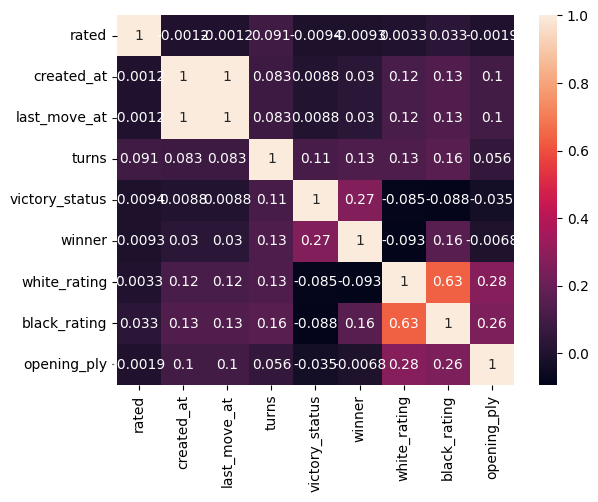

In [22]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [23]:
le = LabelEncoder()
df['moves'] = le.fit_transform(df['moves'])

In [24]:
df.drop(columns=['increment_code','opening_eco','opening_name'],inplace=True)

In [25]:
df

,rated,created_at,last_move_at,turns,victory_status,winner,white_rating,black_rating,moves,opening_ply
0,0,1.504210e+12,1.504210e+12,13,0,0,1500,1191,4524,5
1,1,1.504130e+12,1.504130e+12,16,1,1,1322,1261,1987,4
2,1,1.504130e+12,1.504130e+12,61,2,0,1496,1500,16383,3
3,1,1.504110e+12,1.504110e+12,61,2,0,1439,1454,3770,3
4,1,1.504030e+12,1.504030e+12,95,2,0,1523,1469,15622,5
...,...,...,...,...,...,...,...,...,...,...
20053,1,1.499791e+12,1.499791e+12,24,1,0,1691,1220,6118,2
20054,1,1.499698e+12,1.499699e+12,82,2,1,1233,1196,5421,2
20055,1,1.499698e+12,1.499698e+12,35,2,0,1219,1286,3431,3
20056,1,1.499696e+12,1.499697e+12,109,1,0,1360,1227,11217,4


In [26]:
df['moves'].min()

0

In [27]:
df['moves'].max()

18919

In [28]:
# feature target split
x = df.drop(columns=['winner'])
y = df['winner']

In [29]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
# feature scaling
sc = StandardScaler()
x_train_scaled= sc.fit_transform(x_train)
x_test_scaled= sc.transform(x_test)

In [31]:
#feature selection
from sklearn.feature_selection import SelectKBest,f_classif
selector=SelectKBest(f_classif,k=10)
x_train_kbest=selector.fit_transform(x_train_scaled,y_train)
x_test_kbest=selector.transform(x_test_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=9. All the features will be returned.
  warnings.warn(


In [32]:
# classification model
model=LogisticRegression()
model.fit(x_train_kbest,y_train)


LogisticRegression()

In [33]:
y_pred=model.predict(x_test_kbest)

In [34]:
# model evalution
print("accuracy:",accuracy_score(y_test,y_pred))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))

accuracy: 0.6734795613160518
confusion matrix:
 [[1449  555    0]
 [ 744 1072    0]
 [   2    9  181]]
classification report:
               precision    recall  f1-score   support

           0       0.66      0.72      0.69      2004
           1       0.66      0.59      0.62      1816
           2       1.00      0.94      0.97       192

    accuracy                           0.67      4012
   macro avg       0.77      0.75      0.76      4012
weighted avg       0.67      0.67      0.67      4012



#Grid Search for the best model

In [35]:
params={'C':[0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),params,cv=5)
grid.fit(x_train_kbest,y_train)
print(grid.best_params_)

{'C': 1}


In [36]:
best_model= grid.best_estimator_
y_pred=best_model.predict(x_test_kbest)
print("accuracy:",accuracy_score(y_test,y_pred))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))

accuracy: 0.6734795613160518
confusion matrix:
 [[1449  555    0]
 [ 744 1072    0]
 [   2    9  181]]
classification report:
               precision    recall  f1-score   support

           0       0.66      0.72      0.69      2004
           1       0.66      0.59      0.62      1816
           2       1.00      0.94      0.97       192

    accuracy                           0.67      4012
   macro avg       0.77      0.75      0.76      4012
weighted avg       0.67      0.67      0.67      4012



In [37]:
import joblib
joblib.dump(best_model,'best_model.pkl')
model=joblib.load('best_model.pkl')
y_pred=model.predict(x_test_kbest)

In [40]:
df['opening_ply'].max()

28

In [38]:
df

,rated,created_at,last_move_at,turns,victory_status,winner,white_rating,black_rating,moves,opening_ply
0,0,1.504210e+12,1.504210e+12,13,0,0,1500,1191,4524,5
1,1,1.504130e+12,1.504130e+12,16,1,1,1322,1261,1987,4
2,1,1.504130e+12,1.504130e+12,61,2,0,1496,1500,16383,3
3,1,1.504110e+12,1.504110e+12,61,2,0,1439,1454,3770,3
4,1,1.504030e+12,1.504030e+12,95,2,0,1523,1469,15622,5
...,...,...,...,...,...,...,...,...,...,...
20053,1,1.499791e+12,1.499791e+12,24,1,0,1691,1220,6118,2
20054,1,1.499698e+12,1.499699e+12,82,2,1,1233,1196,5421,2
20055,1,1.499698e+12,1.499698e+12,35,2,0,1219,1286,3431,3
20056,1,1.499696e+12,1.499697e+12,109,1,0,1360,1227,11217,4


In [42]:
#input checking
feature_name=['rated(0-true,1-false)', 'created at(0 to 1.5)','last move at(0 to 1.5)','turns','win status(outoftime-0,resign-1,mate-2,draw-3)','white_rating(780 to 2700)','black_rating(780 to 2700)','moves(0 to 19000)','opening_ply(0 to 28)']
print("please enter the following details:")
user_input=[]
for feature in feature_name:
  value=float(input(f"enter {feature}:"))
  user_input.append(value)
  new_input=[user_input]

please enter the following details:
enter rated(0-true,1-false):1
enter created at(0 to 1.5):1.2
enter last move at(0 to 1.5):1.2
enter turns:45
enter win status(outoftime-0,resign-1,mate-2,draw-3):2
enter white_rating(780 to 2700):856
enter black_rating(780 to 2700):567
enter moves(0 to 19000):56
enter opening_ply(0 to 28):5
